In [79]:
#Analise de dados de celulares roubados registrados 
#pelo departamento da DEINTER de São José dos Campos 
#de Janeiro de 2018 à Abril de 2019.
#Utilizando as informações cedidas pelo portal de transparencia do governo do estado de São Paulo 
#é possivel evidenciar as regiões com maiores indices de roubo de celulares 
#e assim aplicar uma solução de segurança. 
#Projeto elaborado para a materia de Graduação de Projeto de Banco de Dados Não Estruturados na FATEC de São José dos Campos.

import pandas as pd
from pandas import Series, DataFrame
import folium
from folium import plugins
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [80]:
path = 'datasets/'
filenames = {'2018_1', '2018_2', '2018_3', '2018_4', '2018_5', '2018_6', '2018_7', '2018_8', '2018_9', '2018_10', '2018_11', '2018_12', '2019_1', '2019_2', '2019_3', '2019_4'}
extension = '.xls'

In [81]:
#Função para percorrer os arquivos de dados e popular o dataframe.
def populaDataFrame():
    dfList = list()

    for file in filenames:
        df= pd.DataFrame(pd.read_csv((path+file+extension), sep='\t', encoding='UTF-16 LE'))
        dfList.append(df)

    df = pd.concat(dfList)
    return df

In [82]:
df = populaDataFrame()
df.reset_index()
df.shape
#Quantidade de linhas e colunas no dataframe.

(11638, 54)

In [83]:
df.sample(10)
#10 linhhas aleatórias e seus dados.

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,NOMEPESSOA,TIPOPESSOA,VITIMAFATAL,RG,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
366,2019,103,103/2019,18/01/2019 01:20:06,18/01/2019 01:40:52,16/01/2019,PELA MANHÃ,18/01/2019,18/01/2019 01:20:06,Desconhecida,Não,NaN,AVENIDA ERNESTO ALBUQUERQUE,80.0,PORTO NOVO,CARAGUATATUBA,SP,"-23,6820071488043","-45,4348162973913",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,81º D.P. BELEM,01º D.P. CARAGUATATUBA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola
235,2018,457,457/2018,11/02/2018 11:25:33,11/02/2018 11:48:54,11/02/2018,PELA MANHÃ,11/02/2018,11/02/2018 11:25:33,Desconhecida,Não,NaN,AVENIDA UM,481.0,RIO COMPRIDO,S.JOSE DOS CAMPOS,SP,"-23,2578235042809","-45,9392872553964",Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,DEL.SEC.POL.SJCAMPOS PL SUL,03º D.P. S.JOSE DOS CAMPOS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,LG
142,2019,339,339/2019,08/02/2019 21:03:28,08/02/2019 21:25:05,08/02/2019,PELA MANHÃ,08/02/2019,08/02/2019 21:03:28,Desconhecida,Não,NaN,RODOVIA GERALDO SCAVONE,22.0,RIO COMPRIDO,JACAREI,SP,"-23,259758113","-45,932940104",Comércio e serviços,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,DEL.SEC.JACAREI PLANTÃO,01º D.P. JACAREI,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - ESTABELECIMENTO COMERCIAL,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Samsung
763,2018,253,253/2018,20/02/2018 13:01:10,20/02/2018 13:15:24,15/02/2018,A TARDE,20/02/2018,20/02/2018 13:01:10,Conhecida,Sim,115/2018 - 130202,PRAÇA CÔNEGO SIQUEIRA,1.0,ALTO CRUZEIRO,CUNHA,SP,"-23,0804000313499","-44,9613223492",Via pública,IC,BO PARA ADENDO,DEL.SEC.GUARATINGUETA PLANTÃO,DEL.POL.CUNHA,Título VIII - Incolumidade pública (arts. 250 ...,Explosão (art. 251),NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola
577,2019,174,174/2019,28/01/2019 17:33:13,28/01/2019 18:45:19,28/01/2019,A TARDE,28/01/2019,28/01/2019 17:33:13,Desconhecida,Não,NaN,RUA RUA JOAO FERNANDES CARDOSO FILHO,0.0,PORTO NOVO,CARAGUATATUBA,SP,"-23,685957030189","-45,4398439617812",Via pública,NaN,BO PARA INVESTIGAÇÃO,01º D.P. CARAGUATATUBA,01º D.P. CARAGUATATUBA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,"caput. Subtrair coisa móvel alheia, mediante g...",Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,2.0,Apple
542,2018,2453,2453/2018,24/07/2018 23:17:23,25/07/2018 00:29:00,24/07/2018,A TARDE,24/07/2018,24/07/2018 23:17:23,Desconhecida,Não,NaN,PRAÇA PARAIBA,120.0,VILA SÃO PEDRO,S.JOSE DOS CAMPOS,SP,"-23,1914322315115","-45,8667518390474",Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,DEL.SEC.POL.SJCAMPOS PL CENTRO,02º D.P. S.JOSE DOS CAMPOS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola
727,2018,41,41/2018,31/01/2018 13:23:30,31/01/2018 13:33:26,30/01/2018,A NOITE,31/01/2018,31/01/2018 13:23:30,Desconhecida,Não,NaN,PRAIA CENTRO,99999.0,INDAIA,CARAGUATATUBA,SP,"-23,6337030569999","-45,42303598

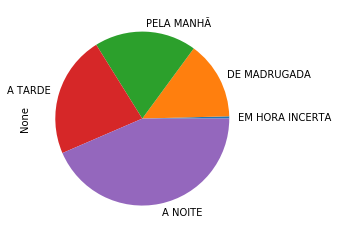

In [84]:
df.groupby('PERIDOOCORRENCIA').size().sort_values().plot(kind='pie')
#Gráfico de pizza com os períodos de ocorrência dos roubos de celulares.

In [85]:
df['PERIDOOCORRENCIA'].value_counts().to_frame()
#Dados quantitativos com os períodos de ocorrência dos roubos de celulares.

,PERIDOOCORRENCIA
A NOITE,5064
A TARDE,2631
PELA MANHÃ,2206
DE MADRUGADA,1688
EM HORA INCERTA,49


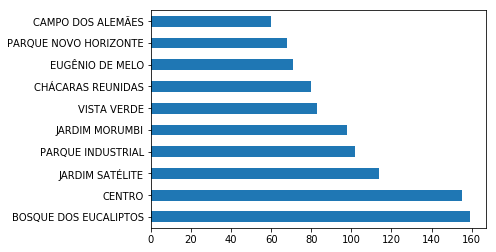

In [86]:
df.query('CIDADE == "S.JOSE DOS CAMPOS"')['BAIRRO'].value_counts().head(10).plot(kind='barh')
#Gráfico de barras horizontais contendo os bairros de SJC com mais ocorrência dos roubos de celulares.

In [87]:
df.query('CIDADE == "S.JOSE DOS CAMPOS"')['BAIRRO'].value_counts().to_frame().head(10)
#Dados quantitativos contendo os bairros de SJC com mais ocorrência dos roubos de celulares.

,BAIRRO
BOSQUE DOS EUCALIPTOS,159
CENTRO,155
JARDIM SATÉLITE,114
PARQUE INDUSTRIAL,102
JARDIM MORUMBI,98
VISTA VERDE,83
CHÁCARAS REUNIDAS,80
EUGÊNIO DE MELO,71
PARQUE NOVO HORIZONTE,68
CAMPO DOS ALEMÃES,60


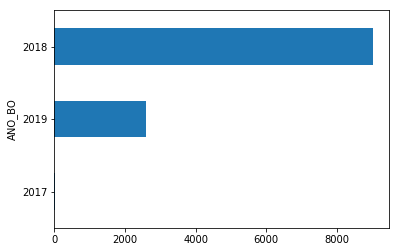

In [88]:
df.groupby('ANO_BO').size().sort_values().plot(kind='barh')
#Gráfico de barras horizontais contendo a quantidade de BO's por ano de SJC sos roubos de celulares.

In [89]:
df['ANO_BO'].value_counts().to_frame()
#Dados quantitativos contendo a quantidade de BO's por ano de SJC sos roubos de celulares.

,ANO_BO
2018,9034
2019,2603
2017,1


In [90]:
df2019_4= pd.DataFrame(pd.read_csv((path+"2019_4"+extension), sep='\t', encoding='UTF-16 LE'))
df2019_4.shape
#Populando o dataframe com o arquivo de dados de 2019-4 e exibindo a quantidade de linhas e colunas.

(623, 54)

In [91]:
geolocalizacoes = df2019_4[['LATITUDE', 'LONGITUDE', 'PERIDOOCORRENCIA']].copy()
geolocalizacoes.isnull().sum()
#Copiando o dataframe com as informações que iremos utilizar e exibindo a quantidade de campos nulos.

LATITUDE            71
LONGITUDE           71
PERIDOOCORRENCIA     0
dtype: int64

In [92]:
geolocalizacoes.dropna(inplace=True)
geolocalizacoes.isnull().sum()
#Removendo os campos nulos e exibindo novamente a quantidade de campos nulos.

LATITUDE            0
LONGITUDE           0
PERIDOOCORRENCIA    0
dtype: int64

In [93]:
coordenadas = []
lat = geolocalizacoes['LATITUDE'].values

long = geolocalizacoes['LONGITUDE'].values

periodo = geolocalizacoes['PERIDOOCORRENCIA'].values

colors = {
 'DE MADRUGADA': 'blue',
 'PELA MANHÃ': 'green',
 'A TARDE': 'orange',
 'A NOITE': 'red',
 'EM HORA INCERTA': 'purple',
}

mapa = folium.Map(location=[-23.1791, -45.8872],tiles='OpenStreetMap',zoom_start=10)
cont = 0
for la,lo,p in zip(lat,long,periodo):
    folium.Marker(
        location=[float(la.replace(",", ".")), float(lo.replace(",", "."))],
        icon=folium.Icon(color=colors[p])
    ).add_to(mapa)

mapa
#Através da biblioteca do Folium criamos um novo mapa, marcamos os roubos de celulares de abril 2019
#com as latitudes e longitudes do dataframe e definimos a cor do marcador através do período de ocorrência.

In [102]:
from IPython.display import HTML, display
#mapa._build_map()
mapa._repr_html_()
#mapa.get_root().render()
mapWidth, mapHeight = (400,500) # width and height of the displayed iFrame, in pixels
#srcdoc = mapa.HTML.replace('"', '&quot;')
srcdoc = mapa
width, height = 650, 500
embed = HTML('<iframe srcdoc="{}" '
             'style="width: {}px; height: {}px; display:block; width: 50%; margin: 0 auto; '
             'border: none"></iframe>'.format(srcdoc, width, height))
embed

In [95]:
geolocalizacoes = df[['LATITUDE', 'LONGITUDE', 'PERIDOOCORRENCIA']].copy()
geolocalizacoes.isnull().sum()
#Copiando o dataframe com as informações que iremos utilizar e exibindo a quantidade de campos nulos.

LATITUDE            1748
LONGITUDE           1748
PERIDOOCORRENCIA       0
dtype: int64

In [96]:
geolocalizacoes.dropna(inplace=True)
geolocalizacoes.isnull().sum()
#Removendo os campos nulos e exibindo novamente a quantidade de campos nulos.

LATITUDE            0
LONGITUDE           0
PERIDOOCORRENCIA    0
dtype: int64

In [97]:
coordenadas = []
lat = geolocalizacoes['LATITUDE'].values

long = geolocalizacoes['LONGITUDE'].values

mapa = folium.Map(location=[-23.1791, -45.8872],tiles='OpenStreetMap',zoom_start=10)
 
for la,lo in zip(lat,long):
    coordenadas.append([float(la.replace(",", ".")),float(lo.replace(",", "."))])
    
mapa.add_child(plugins.HeatMap(coordenadas))
#Através da biblioteca do Folium criamos um novo mapa e populamos ele com as latitudes e longitudes do dataframe
#Utilizando um mapa de calor marcamos os pontos de roubos de celulares de janeiro de 2018 à  abril 2019